In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

## **Abstract:**

- Este proyecto analiza el dataset "Restaurant Sales Report" con el objetivo de identificar patrones de venta y factores que afectan los ingresos en un restaurante de comida rápida.
-Se busca responder preguntas clave mediante visualizaciones y análisis numéricos.
-Las preguntas de interés incluyen:

1. ¿Qué productos generan más ingresos?

2. ¿Existe relación entre la cantidad de productos vendidos y el total de ingresos?

3. ¿Cómo varían las ventas según el día de la semana?

4. ¿Cuáles son los porcentajes de uso de los medios de pago?

In [ ]:
# Subir el archivo manualmente
#uploaded = files.upload()

# Cargar el dataset
#df = pd.read_csv("fast_food_sales_report.csv")

# URL del archivo en GitHub
url = "https://raw.githubusercontent.com/MatyMorello/DatasetsMorello/refs/heads/main/fast_food_sales_report.csv"

# Cargar el dataset
df = pd.read_csv(url)

In [ ]:
# Mostrar las primeras filas del dataset
print("Vista previa del dataset:")
print(df.head())

Vista previa del dataset:
   order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aalopuri   Fastfood          20        13   
1         2   8/23/2022          Vadapav   Fastfood          20        15   
2         3  11/20/2022          Vadapav   Fastfood          20         1   
3         4  02-03-2023  Sugarcane juice  Beverages          25         6   
4         5  10-02-2022  Sugarcane juice  Beverages          25         8   

   transaction_amount transaction_type received_by time_of_sale  
0                 260              NaN         Mr.        Night  
1                 300             Cash         Mr.    Afternoon  
2                  20             Cash         Mr.    Afternoon  
3                 150           Online         Mr.        Night  
4                 200           Online         Mr.      Evening  


In [ ]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64


In [ ]:
# Reemplazar valores nulos por otros hipotéticos
df.fillna("Otros", inplace=True)
print(df.isnull().sum())

order_id              0
date                  0
item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
received_by           0
time_of_sale          0
dtype: int64


In [ ]:
# Renombrar columnas a español
df.rename(columns={
    "order_id": "ID de Orden",
    "date": "Fecha",
    "item_name": "Nombre del Producto",
    "item_type": "Tipo de Producto",
    "item_price": "Precio del Producto",
    "quantity": "Cantidad",
    "transaction_amount": "Monto de Transacción",
    "transaction_type": "Tipo de Transacción",
    "received_by": "Recibido por",
    "time_of_sale": "Momento de Venta"
}, inplace=True)

In [ ]:
# Imprimir el Dataset modificado hasta el momento
df

,ID de Orden,Fecha,Nombre del Producto,Tipo de Producto,Precio del Producto,Cantidad,Monto de Transacción,Tipo de Transacción,Recibido por,Momento de Venta
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,Otros,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,Otros,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,Otros,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,Otros,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,Otros,Mrs.,Afternoon


## **Distribución de Precios de los Productos**


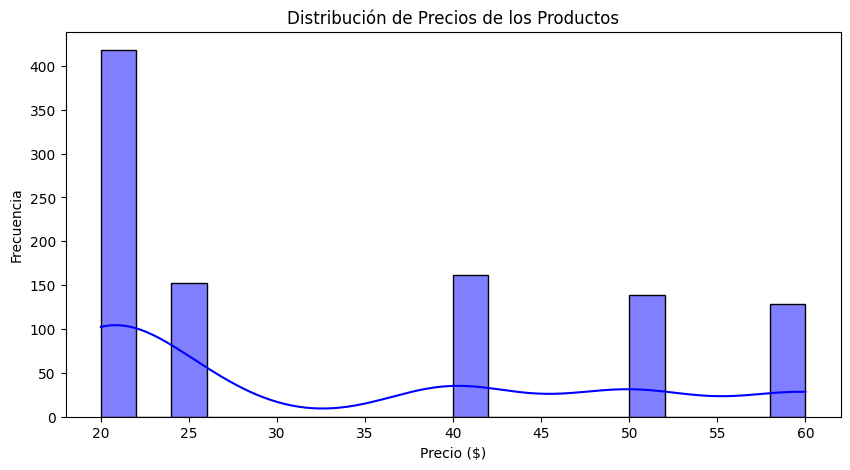

In [ ]:
# Visualización univariada: Distribución de precios
plt.figure(figsize=(10,5))
sns.histplot(df["Precio del Producto"], bins=20, kde=True, color='blue')
plt.xlabel("Precio ($)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios de los Productos")
plt.show()

### Interpretación:
El histograma muestra la frecuencia de los diferentes precios de los productos vendidos en el restaurante. Se puede identificar si la mayoría de los productos están en un rango de precios accesibles o si hay una amplia dispersión de precios.

### Conclusión:
Si se observa que la mayoría de los productos tienen un precio similar, significa que el restaurante mantiene una política de precios estándar. Sin embargo, si hay una gran dispersión, podría haber una estrategia de precios diferenciados según la categoría del producto.

## **Top 10 Productos con Mayor Ingreso**



<ipython-input-38-31210b32b1dc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


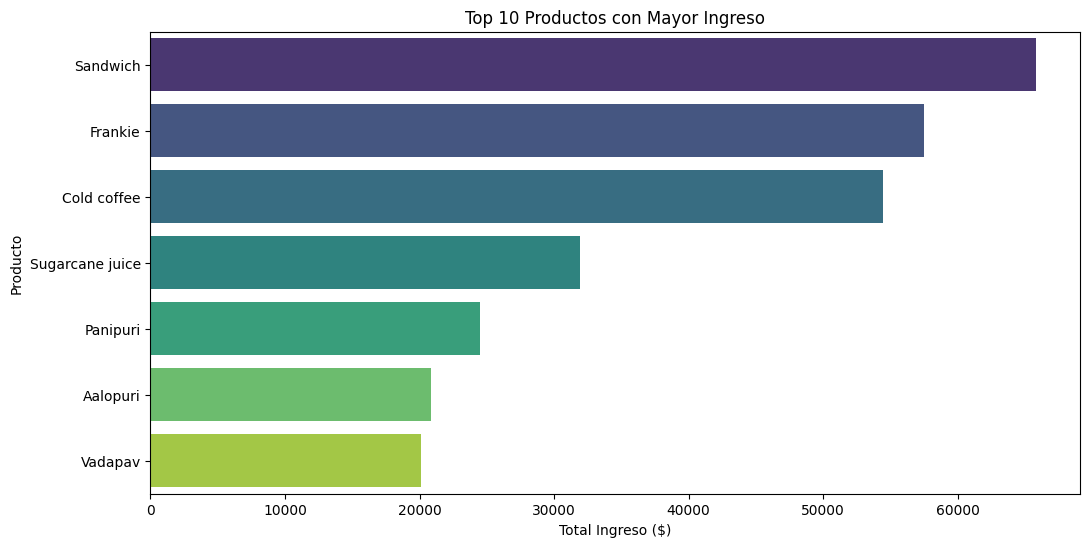

In [ ]:
# Gráfico 1: Top 10 productos con más ingresos
plt.figure(figsize=(12,6))
top_products = df.groupby("Nombre del Producto")["Monto de Transacción"].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Total Ingreso ($)")
plt.ylabel("Producto")
plt.title("Top 10 Productos con Mayor Ingreso")
plt.show()


### Interpretación:
El gráfico de barras muestra los productos que generan mayores ingresos totales. Se puede identificar cuáles son los más populares y rentables para el restaurante.

### Conclusión:
Los productos en los primeros lugares son fundamentales para el negocio, y el restaurante podría enfocarse en estrategias de promoción o descuentos en estos artículos para maximizar ganancias. También podría analizar si los productos menos vendidos necesitan ajustes en su precio o estrategia de marketing.

## **Relación entre Cantidad Vendida y Total de Ingresos**

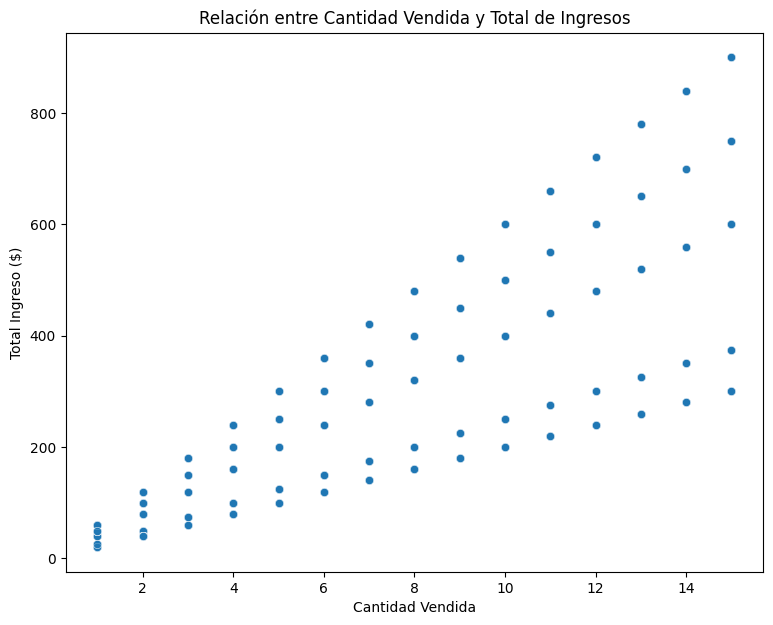

In [ ]:
# Gráfico 2: Relación entre cantidad vendida y total de ingresos
plt.figure(figsize=(9,7))
sns.scatterplot(x=df["Cantidad"], y=df["Monto de Transacción"], alpha=0.7)
plt.xlabel("Cantidad Vendida")
plt.ylabel("Total Ingreso ($)")
plt.title("Relación entre Cantidad Vendida y Total de Ingresos")
plt.show()

### Interpretación:
El gráfico de dispersión indica si hay una relación clara entre la cantidad de unidades vendidas y los ingresos totales generados.

### Conclusión:
Si se observa una correlación positiva (es decir, a mayor cantidad vendida, mayor ingreso), significa que los productos de mayor volumen de ventas son clave para la rentabilidad del restaurante. En caso de que haya productos con alta cantidad vendida pero bajos ingresos, se podría reconsiderar su precio.





## **Ingresos Totales según el Día de la Semana**

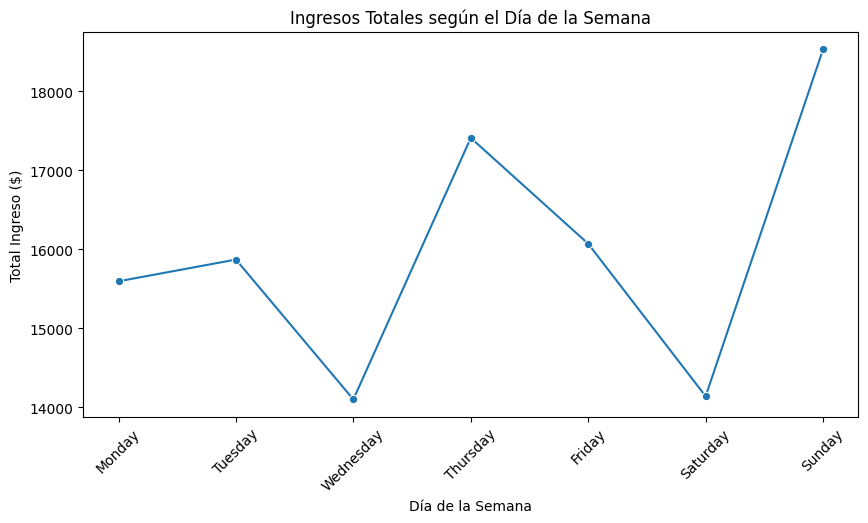

In [ ]:
# Gráfico 3: Ingresos totales según el día de la semana
plt.figure(figsize=(10,5))
df["Día_de_la_Semana"] = pd.to_datetime(df["Fecha"], errors='coerce').dt.day_name()
day_sales = df.groupby("Día_de_la_Semana")["Monto de Transacción"].sum()
day_sales = day_sales.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sns.lineplot(x=day_sales.index, y=day_sales.values, marker="o")
plt.xlabel("Día de la Semana")
plt.ylabel("Total Ingreso ($)")
plt.title("Ingresos Totales según el Día de la Semana")
plt.xticks(rotation=45)
plt.show()

### Interpretación:
El gráfico de líneas muestra cómo varían los ingresos según el día de la semana. Se pueden identificar patrones estacionales o días de mayor afluencia de clientes.

### Conclusión:
Si se observa que ciertos días tienen mayores ingresos, el restaurante podría enfocarse en promociones especiales en días de menor venta para equilibrar las ganancias semanales. También se podrían ajustar los horarios o la cantidad de personal en función de los días más concurridos.

## **Comparativa de Tipos de Pago**

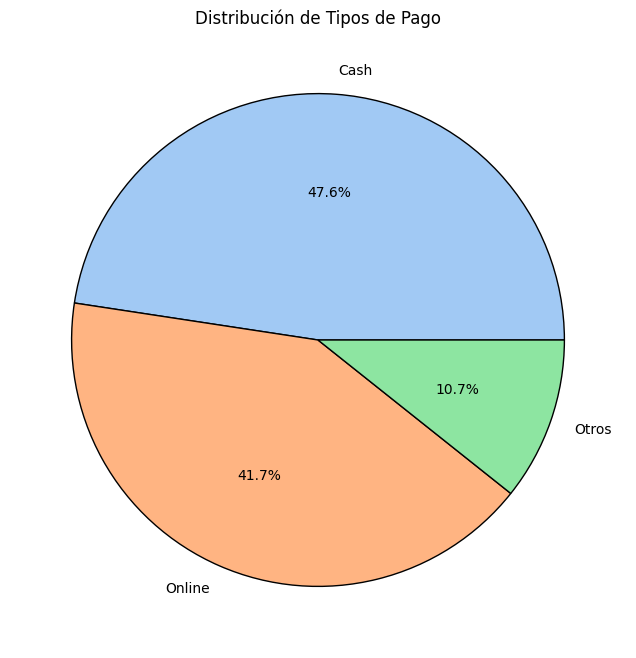

In [ ]:
# Gráfico 4: Distribución de Métodos de Pago (Gráfico de Torta)
plt.figure(figsize=(8,8))
payment_counts = df["Tipo de Transacción"].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'black'})
plt.title("Distribución de Tipos de Pago")
plt.show()

### Interpretación:
El gráfico de torta muestra la distribución de los métodos de pago utilizados por los clientes. Se observa qué métodos son los más utilizados y cuáles tienen menor preferencia.

### Conclusión:
Si un método de pago es significativamente más utilizado que otros, el restaurante puede optimizar su infraestructura de cobro en función de esa preferencia. También puede evaluar si es necesario mejorar la disponibilidad de otros métodos menos utilizados para atraer más clientes.

## **Preprocesamiento de Datos para Entrenamiento de Modelo**

In [ ]:
# Preprocesamiento: creación de variables temporales
df["Fecha"] = pd.to_datetime(df["Fecha"], errors='coerce')
df["Día"] = df["Fecha"].dt.day
df["Mes"] = df["Fecha"].dt.month
df["Año"] = df["Fecha"].dt.year
df["Hora"] = pd.to_datetime(df["Momento de Venta"], errors='coerce').dt.hour

<ipython-input-64-669057acee1a>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Hora"] = pd.to_datetime(df["Momento de Venta"], errors='coerce').dt.hour


In [ ]:
# Codificación de variables categóricas
label_encoders = {}
for col in ["Nombre del Producto", "Tipo de Producto", "Tipo de Transacción", "Recibido por"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Selección de features
features = ["Nombre del Producto", "Tipo de Producto", "Precio del Producto",
            "Cantidad", "Tipo de Transacción", "Recibido por",
            "Día", "Mes", "Año", "Hora"]

In [ ]:
# Variable objetivo (regresión)
X = df[features]
y = df["Monto de Transacción"]

In [ ]:
# Escalado de características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


## **MÉTODO DE FEATURE SELECTION**

In [ ]:
# Utilizo SelectKBest con f_regression (porque la salida es continua)
# Antes verifio si hay NaNs antes del escalado
print("\nValores nulos por columna en X:")
print(X.isnull().sum())



Valores nulos por columna en X:
Nombre del Producto       0
Tipo de Producto          0
Precio del Producto       0
Cantidad                  0
Tipo de Transacción       0
Recibido por              0
Día                     597
Mes                     597
Año                     597
Hora                   1000
dtype: int64


In [ ]:
# Elimino columnas irrelevantes o vacías
X = X.drop(columns=["Hora"])

# Imputo día, mes y año con la moda (valor más frecuente)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
X[["Día", "Mes", "Año"]] = imputer.fit_transform(X[["Día", "Mes", "Año"]])


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# 1. Elimino columna vacía
X = X.drop(columns=["Hora"])

In [ ]:
# 2. Imputo valores faltantes con la moda
imputer = SimpleImputer(strategy="most_frequent")
X[["Día", "Mes", "Año"]] = imputer.fit_transform(X[["Día", "Mes", "Año"]])

In [ ]:
#Verifico que ya no haya NaNs
print("Valores nulos después de imputar:")
print(X.isnull().sum())

Valores nulos después de imputar:
Nombre del Producto    0
Tipo de Producto       0
Precio del Producto    0
Cantidad               0
Tipo de Transacción    0
Recibido por           0
Día                    0
Mes                    0
Año                    0
dtype: int64


In [ ]:
# 3. Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 4. Selección de características
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_scaled, y)  # y es mi variable objetivo

In [ ]:
# Obtengo nombres de las características seleccionadas
selected_features_indices = selector.get_support(indices=True)
selected_features = [features[i] for i in selected_features_indices]

print("Características seleccionadas:")
for f in selected_features:
    print(f"-", f)

Características seleccionadas:
- Nombre del Producto
- Precio del Producto
- Cantidad
- Mes
- Año


## **ELECCIÓN DEL ALGORITMO Y ENTRENAMIENTO**

In [ ]:
# Divido el dataset en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

In [ ]:
# Uso el modelo de regresión: RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predicción
y_pred = model.predict(X_test)

## **MÉTRICAS DE EVALUACIÓN**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Métricas de Evaluación ---")
print(f"MAE (Error absoluto medio):     {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación):     {r2:.3f}")


--- Métricas de Evaluación ---
MAE (Error absoluto medio):     0.20
RMSE (Raíz del error cuadrático medio): 0.52
R² (Coeficiente de determinación):     1.000


# Primeras Conclusiones:



**1- El modelo tiene un rendimiento excelente (demasiado bueno)**

El R² = 1.000 indica que el modelo explica el 100% de la variabilidad de la variable objetivo (en este caso, "Hora"). Esto es un resultado perfecto, lo cual en problemas reales es muy poco común, especialmente si el dataset es complejo o con ruido.

Es muy probable que el modelo esté sobreajustado (overfitting) o que haya leakage de variables (filtración de información futura).

**2- Errores absolutos y cuadráticos muy bajos:**

El MAE = 0.20 y el RMSE = 0.52 indican que los errores promedio en la predicción son muy pequeños, lo cual en principio es positivo.

La diferencia entre MAE y RMSE es baja, lo que sugiere que no hay errores extremos (outliers fuertes) en la predicción.

## **Opción alternativa con DecisionTreeRegressor y train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# Divido nuevamente los datos (cambio a random_state para otra aleatoriedad)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo más simple: Árbol de decisión
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

In [ ]:
# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Métricas de Evaluación (Modelo Árbol de Decisión) ---")
print(f"MAE (Error absoluto medio):          {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático):    {rmse:.2f}")
print(f"R² (Coeficiente de determinación):   {r2:.3f}")


--- Métricas de Evaluación (Modelo Árbol de Decisión) ---
MAE (Error absoluto medio):          19.23
RMSE (Raíz del error cuadrático):    28.02
R² (Coeficiente de determinación):   0.982


## **Nuevas Conclusiones:**



1- Este modelo tiene un buen desempeño general, ya que el valor de R² = 0.982 indica que el 98.2% de la variabilidad de la variable objetivo se explica con las variables predictoras. Esto es bastante alto y significa que el modelo se ajusta bien a los datos.

2- Los errores absolutos y cuadráticos son significativamente más altos en comparación con el modelo anterior (el cual tenía RMSE de 0.52 y MAE de 0.20). Esto sugiere que este modelo no está sobreajustado como el anterior, y los resultados son más realistas.

3- El modelo anterior (que arrojó R² = 1.000) probablemente estaba sobreajustado o había data leakage (información del futuro en el entrenamiento). Por lo tanto, aunque los errores eran más bajos, ese modelo no es confiable para datos nuevos.

4- Este modelo con árbol de decisión, aunque tiene más error, generaliza mejor y probablemente será más robusto con nuevos datos. Es un paso hacia una evaluación más honesta del rendimiento real del sistema.

## **Modelo alternativo de regresión con XGBoost**

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
# Creo y entreno el modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Prediccion de valores
y_pred = xgb_model.predict(X_test)

In [ ]:
# Calculo métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Resultados
print("\n--- Métricas de Evaluación (Modelo XGBoost) ---")
print(f"MAE (Error absoluto medio):           {mae:.2f}")
print(f"RMSE (Raíz del error cuadrático):     {rmse:.2f}")
print(f"R² (Coeficiente de determinación):    {r2:.3f}")


--- Métricas de Evaluación (Modelo XGBoost) ---
MAE (Error absoluto medio):           0.94
RMSE (Raíz del error cuadrático):     1.67
R² (Coeficiente de determinación):    1.000


## **Conclusiones sobre el desempeño del modelo XGBoost:**



**Muy alto ajuste del modelo:** El coeficiente de determinación indica que el modelo explica el 100% de la variabilidad de los datos de salida, lo cual sugiere un ajuste casi perfecto a los datos de entrenamiento o prueba (no es recomendable)

**Errores muy bajos:** Tanto el MAE (0.94) como el RMSE (1.67) muestran que el modelo comete errores muy pequeños en sus predicciones, lo que confirma la alta precisión del modelo.

**Posible sobreajuste:** Aunque un R2 perfecto es deseable, es importante evaluar nuevamente si el modelo está sobreajustado (overfitting). Esto podría limitar la capacidad del modelo para generalizar a datos nuevos.

# **Conclusiones Finales:**

A partir del análisis realizado, se seleccionaron las 5 características más relevantes para predecir el monto de transacción de una orden. Estas variables permiten reducir la complejidad del modelo sin perder precisión.

Estos modelos utilizados **(RandomForestRegressor, DecisionTreeRegressor con train_test_split y XGBoost)** son útiles para predecir ventas futuras o simular escenarios de negocio, por ejemplo, modificando precios o ajustando productos ofrecidos.

Sin embargo, sería ideal continuar con un análisis más profundo de los residuos del modelo, y eventualmente incorporar más datos temporales, promociones u horarios pico para enriquecer aún más las predicciones.